In [1]:
# Install necessary libraries
!pip install transformers pandas

In [5]:
# Import required libraries
import pandas as pd
from transformers import pipeline
from google.colab import files

In [6]:
# Upload the file manually
uploaded = files.upload()

# Read the uploaded CSV file (replace with the correct filename)
file_path = 'wine_reviews.csv'  # Ensure this matches the uploaded filename
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())

Saving wine_reviews.csv to wine_reviews.csv
                                              review
0  Easily the best Sauvignon Blanc I've had to da...
1                      Excellent, Mockingbird Inn?\n
2  Absolutely incredible. One of the best sauvign...
3                   Reported in nytimes. Did not try
4  Great. Much different than other Sauv Blancs s...


In [7]:
# Initialize the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define candidate labels
labels = [
    "talks about food combinations",
    "talks about taste",
    "talks about value for money",
    "other"
]

# Function to classify each review
def classify_review(review):
    try:
        result = classifier(review, labels)
        return result['labels'][0]  # The top label
    except Exception as e:
        return "other"  # Default to "other" in case of errors

# Apply classification to the reviews column
data['talks_about'] = data['review'].apply(classify_review)  # Replace 'review' with your actual column name

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [8]:
# Save the updated DataFrame to a new CSV file
output_path = '/content/wine_reviews_with_labels.csv'  # Default Colab directory
data.to_csv(output_path, index=False)

# Provide the download link for the new CSV file
from google.colab import files
files.download(output_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

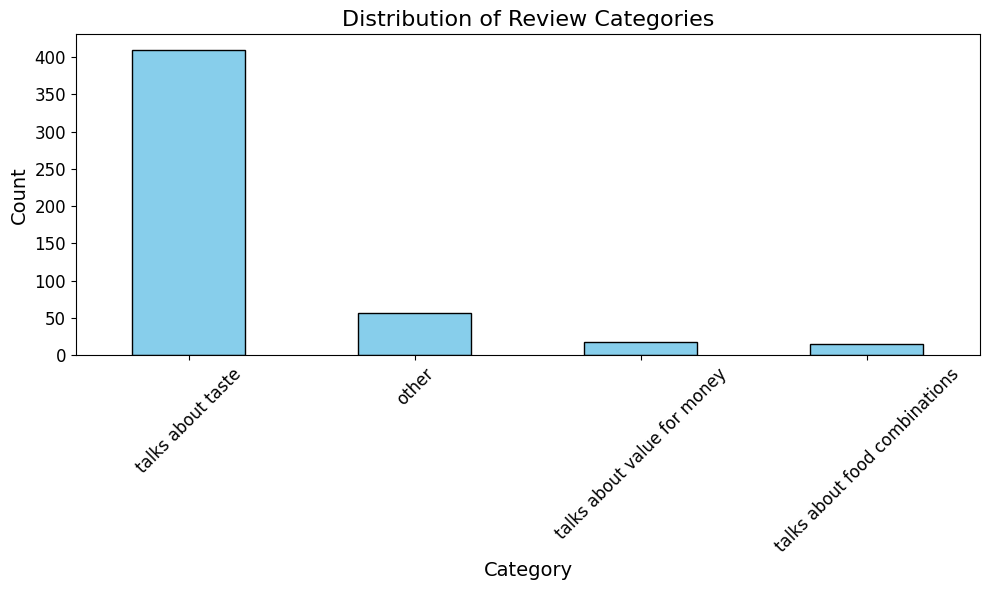

In [9]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = data['talks_about'].value_counts()

# Plot the distribution as a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add chart details
plt.title('Distribution of Review Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Show the chart
plt.tight_layout()
plt.show()